In [115]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [116]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/london_weather.csv")

data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [117]:
# Lista delle colonne da riempire con la media
columns_to_fill = [
    "cloud_cover",
    "global_radiation",
    "max_temp",
    "mean_temp",
    "min_temp",
    "precipitation",
    "snow_depth",
    "pressure"
]

# Riempire i valori mancanti con la media
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mean())

In [118]:
# Assicurati che l'indice delle date sia in formato datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')  # Assicurati che la colonna delle date sia nel formato giusto
data.set_index('date', inplace=True)


In [119]:
data.isnull().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [120]:
data.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


TIME SERIES


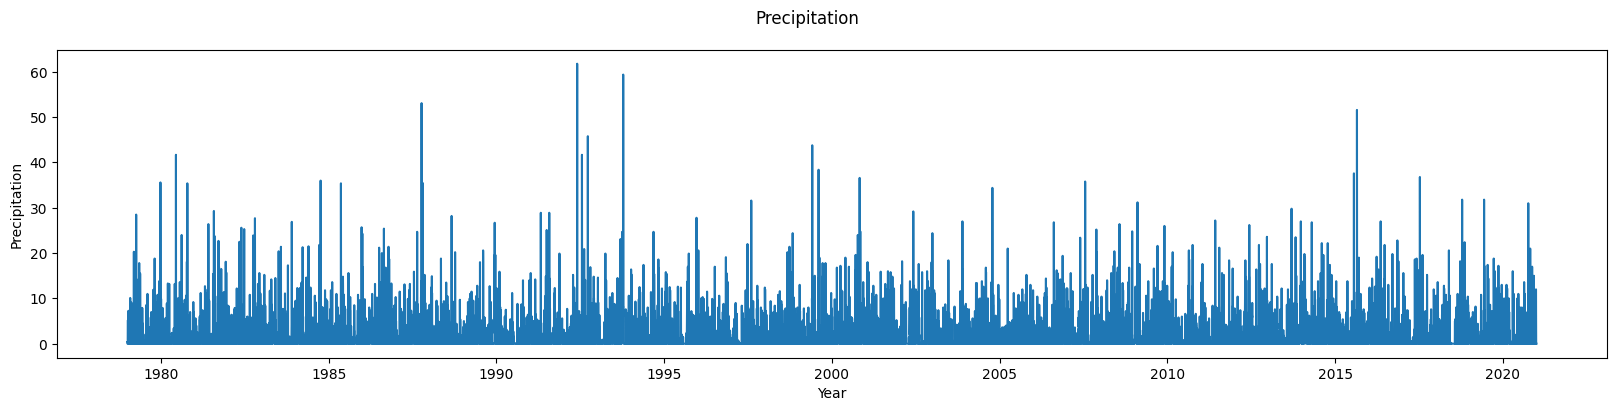

In [121]:

# Creazione del grafico
plt.figure(figsize=(20, 4))
plt.suptitle('Precipitation')
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation')

# Tracciare il grafico con dati mensili
plt.plot(data.index, data['precipitation'])
plt.show()



In [122]:

# Eseguire il test ADF
result = adfuller(data['precipitation'])

# Stampare i risultati
print("Risultati test di Dickey-Fuller:")
print(f"Statistiche del test: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Numero di lag usati: {result[2]}")
print(f"Numero di osservazioni usate: {result[3]}")
print("Valori critici:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")


Risultati test di Dickey-Fuller:
Statistiche del test: -40.01370800357943
P-value: 0.0
Numero di lag usati: 6
Numero di osservazioni usate: 15334
Valori critici:
	1%: -3.4307765289571774
	5%: -2.8617285076489316
	10%: -2.566870338019283


<Figure size 1200x600 with 0 Axes>

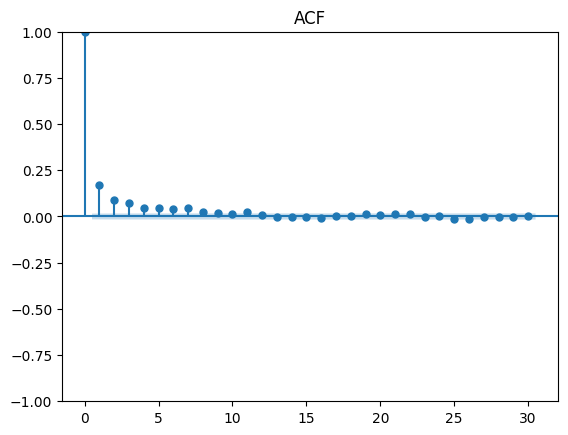

<Figure size 1200x600 with 0 Axes>

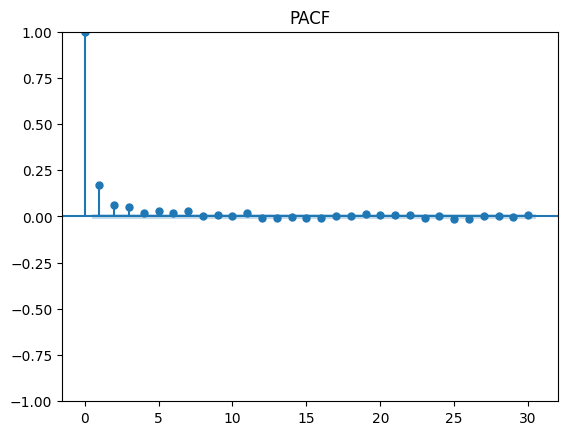

In [123]:

# Grafico ACF
plt.figure(figsize=(12, 6))
plot_acf(data['precipitation'], lags=30, alpha=0.05, title='ACF')
plt.show()

# Grafico PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['precipitation'], lags=30, alpha=0.05, method='ols', title='PACF')
plt.show()

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

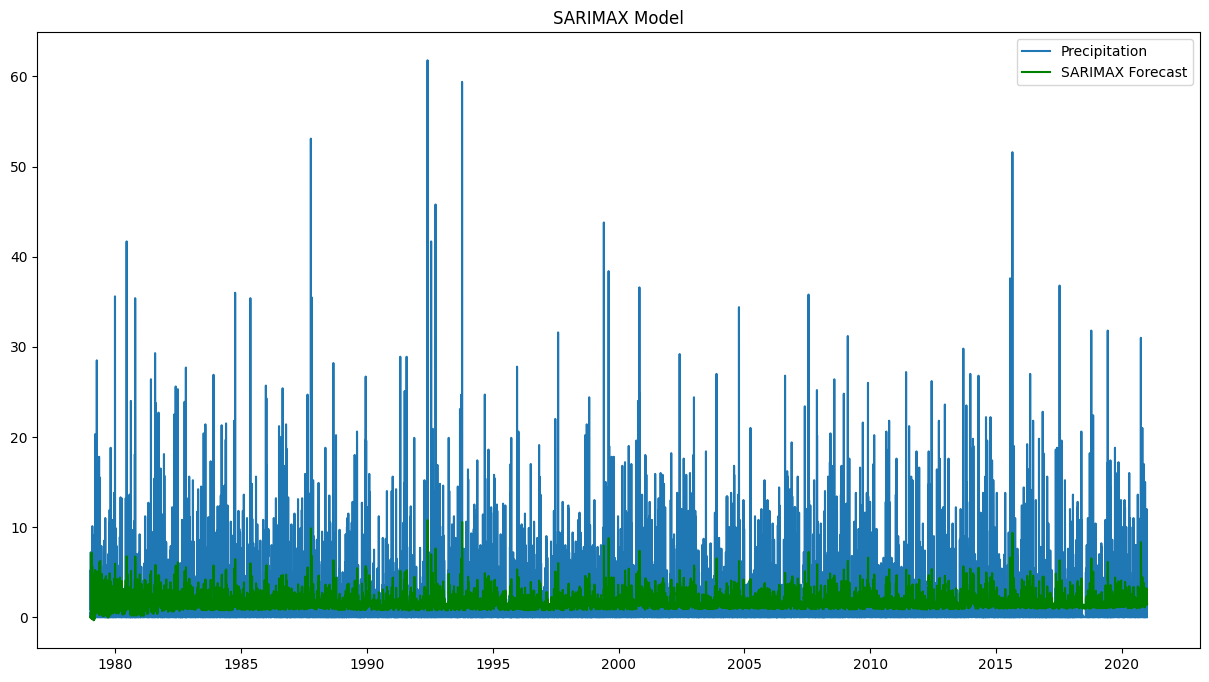

Best Parameters: {'D': 1, 'P': 0, 'Q': 1, 'd': 0, 'p': 1, 'q': 1, 's': 12}
                                     SARIMAX Results                                      
Dep. Variable:                      precipitation   No. Observations:                15341
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood              -41719.531
Date:                            Mon, 03 Mar 2025   AIC                          83447.062
Time:                                    21:36:25   BIC                          83477.612
Sample:                                01-01-1979   HQIC                         83457.187
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6825      0.023     29

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid





# Definizione dei parametri per la grid search
param_grid = {
    'p': [0, 1],
    'd': [0, 1],
    'q': [0, 1],
    'P': [0, 1],
    'D': [0, 1],
    'Q': [0, 1],
    's': [12]
}

best_aic = np.inf
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    try:
        model = SARIMAX(data['precipitation'], 
                        order=(params['p'], params['d'], params['q']),
                        seasonal_order=(params['P'], params['D'], params['Q'], params['s']))
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = params
            best_model = results
    except:
        continue

# Visualizzazione del miglior modello
plt.figure(figsize=(15, 8))
plt.plot(data['precipitation'], label='Precipitation')
plt.plot(best_model.fittedvalues, color='green', label='SARIMAX Forecast')
plt.title('SARIMAX Model')
plt.legend()
plt.show()

print("Best Parameters:", best_params)
print(best_model.summary())


C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precipitation   No. Observations:                15341
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -41711.400
Date:                Mon, 03 Mar 2025   AIC                          83430.800
Time:                        21:36:27   BIC                          83461.353
Sample:                    01-01-1979   HQIC                         83440.925
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6683      0.067     24.944      0.000       1.537       1.799
ar.L1          0.6807      0.023     29.712      0.000       0.636       0.726
ma.L1         -0.5387      0.025    -21.616      0.0

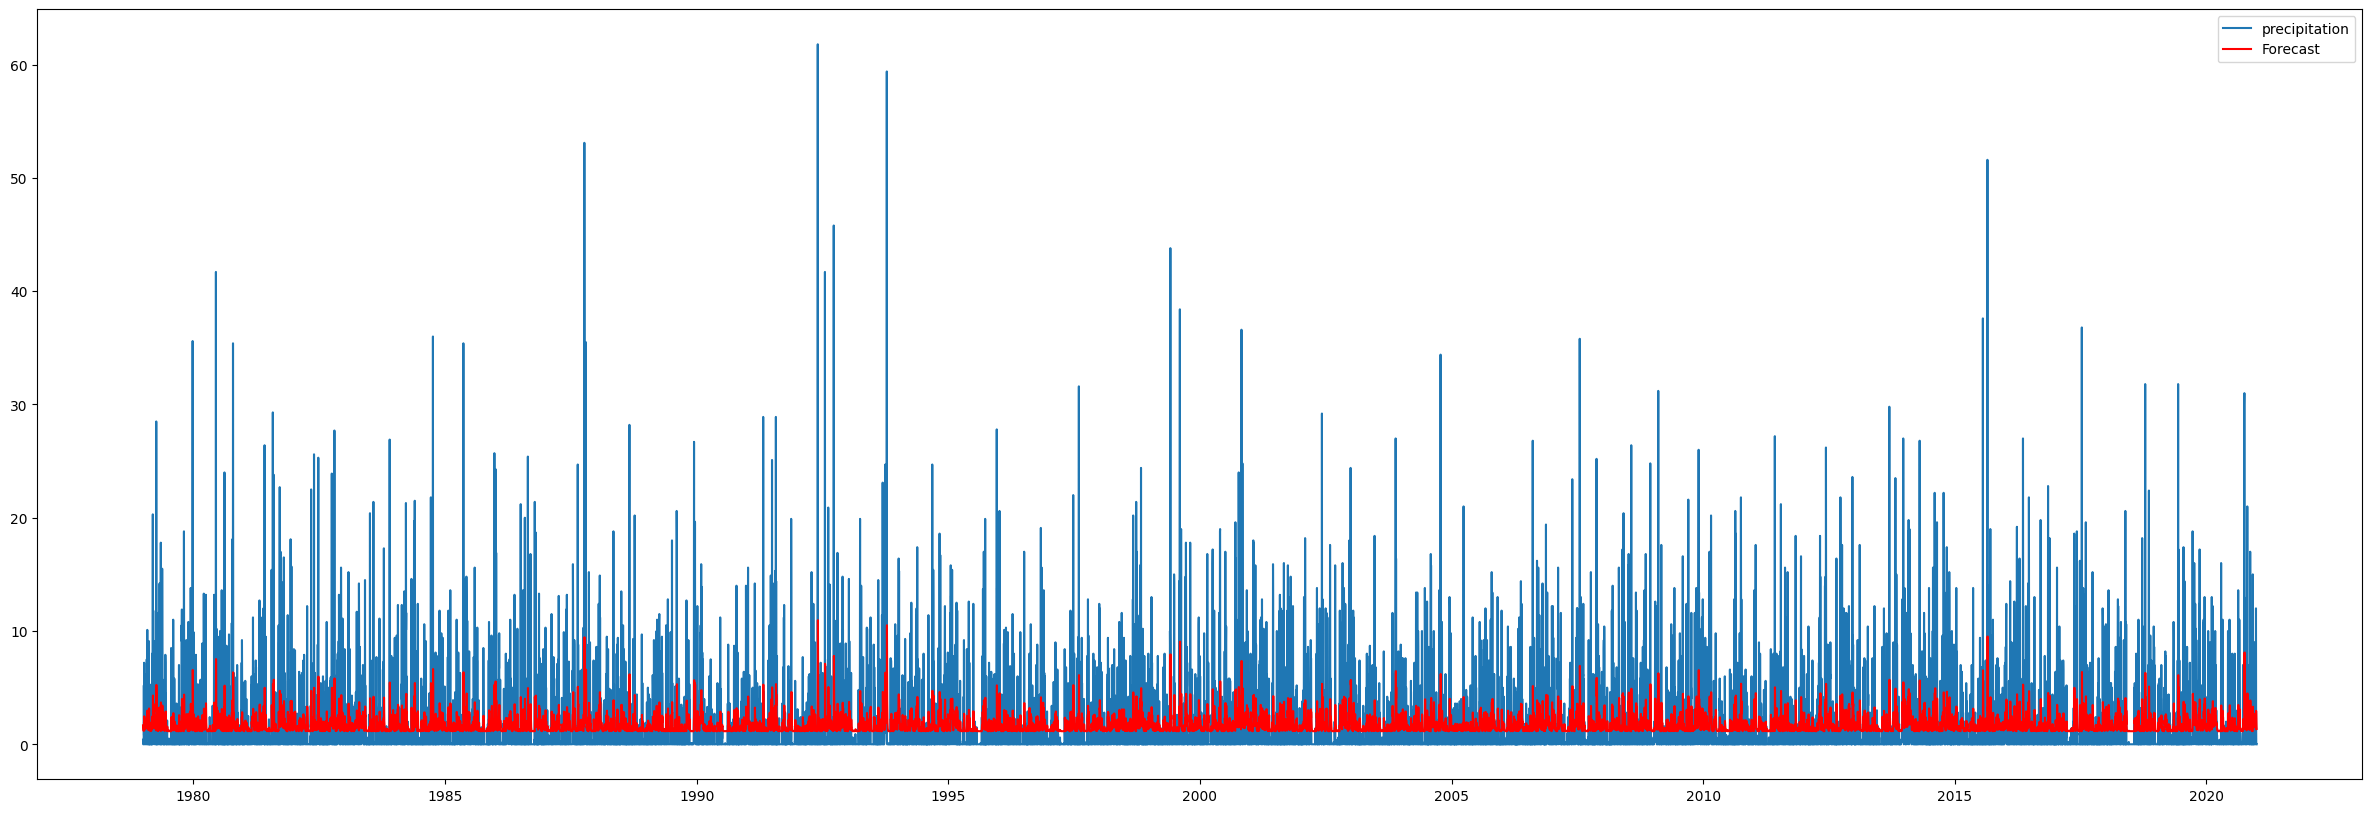

In [125]:
from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(30,10))

# Construct the model
model = ARIMA(data['precipitation'], order=(1, 0, 1))
# Estimate the parameters
results = model.fit()

ax = plt.gca()
plt.plot(data['precipitation'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['precipitation', 'Forecast'])

print(results.summary()) 

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precipitation   No. Observations:                15341
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -41700.851
Date:                Mon, 03 Mar 2025   AIC                          83411.703
Time:                        21:36:30   BIC                          83449.894
Sample:                    01-01-1979   HQIC                         83424.360
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6680      0.071     23.496      0.000       1.529       1.807
ar.L1          0.8104      0.025     32.552      0.000       0.762       0.859
ma.L1         -0.6557      0.025    -25.800      0.0

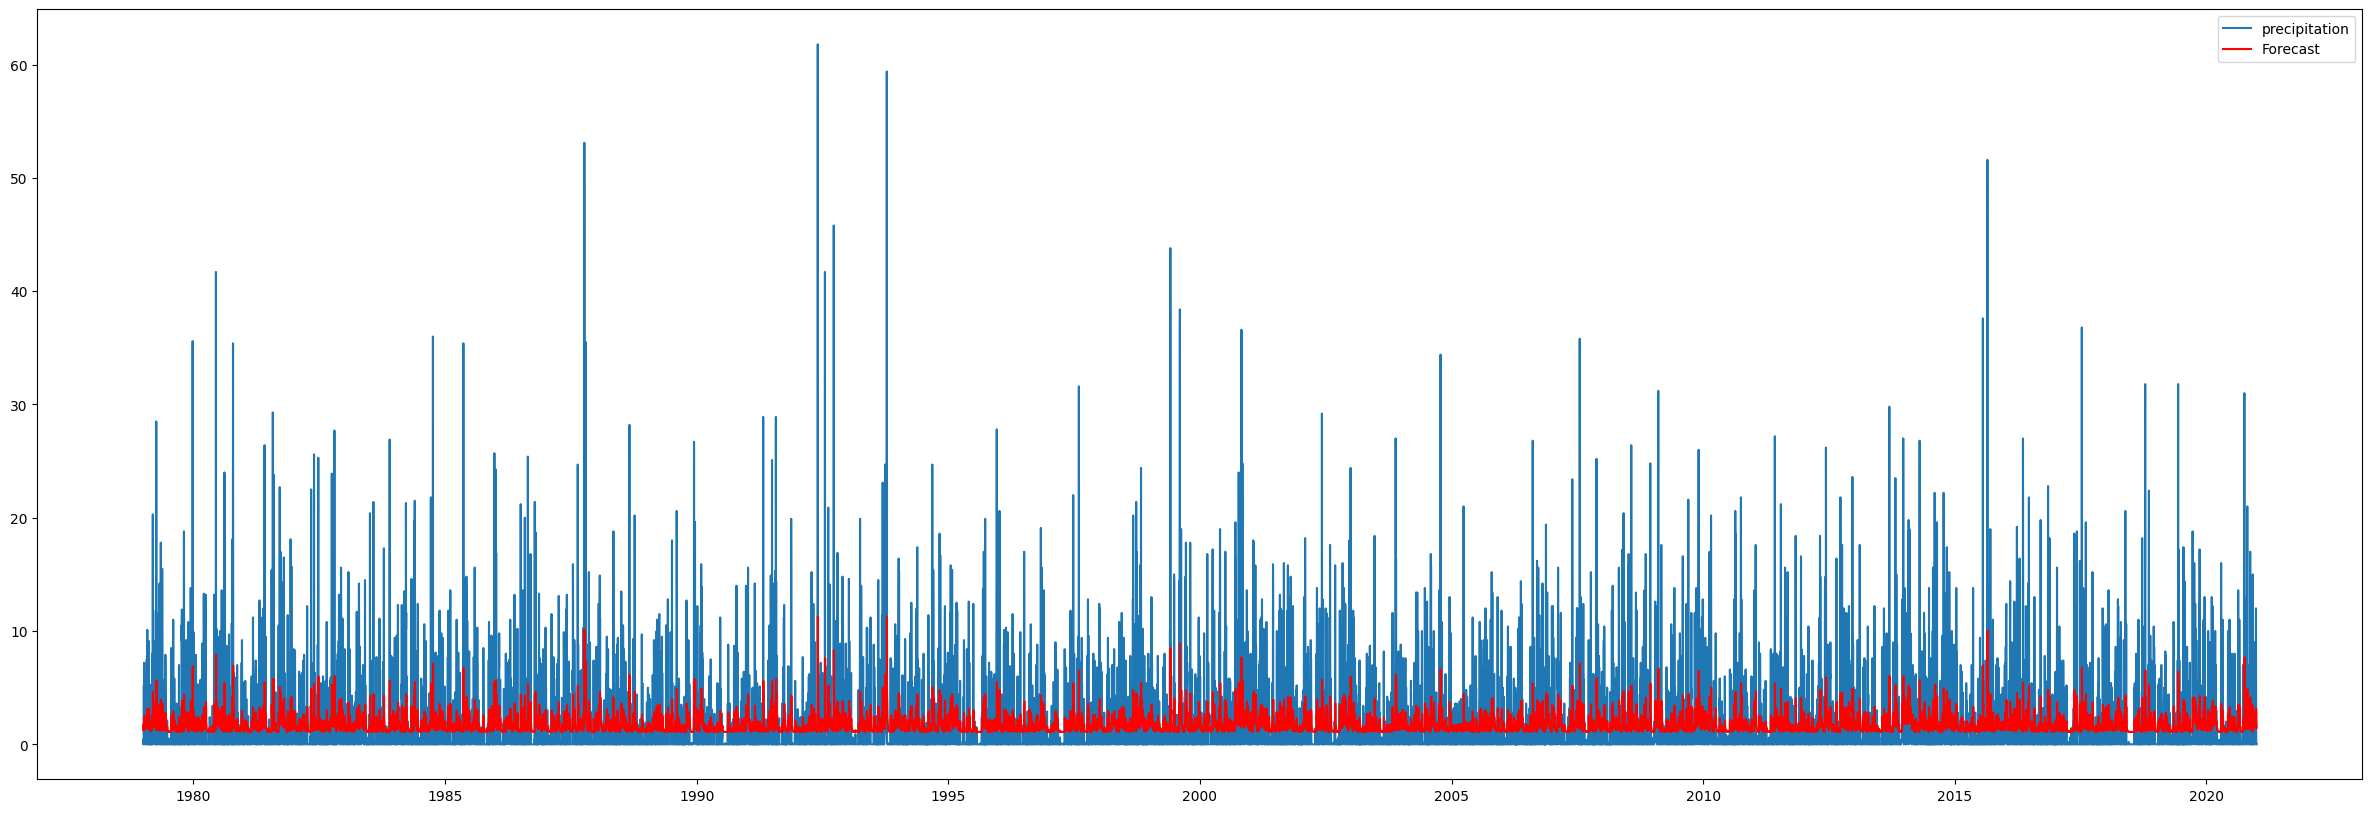

In [126]:
from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(30,10))

# Construct the model
model = ARIMA(data['precipitation'], order=(1, 0, 2))
# Estimate the parameters
results = model.fit()

ax = plt.gca()
plt.plot(data['precipitation'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['precipitation', 'Forecast'])

print(results.summary()) 

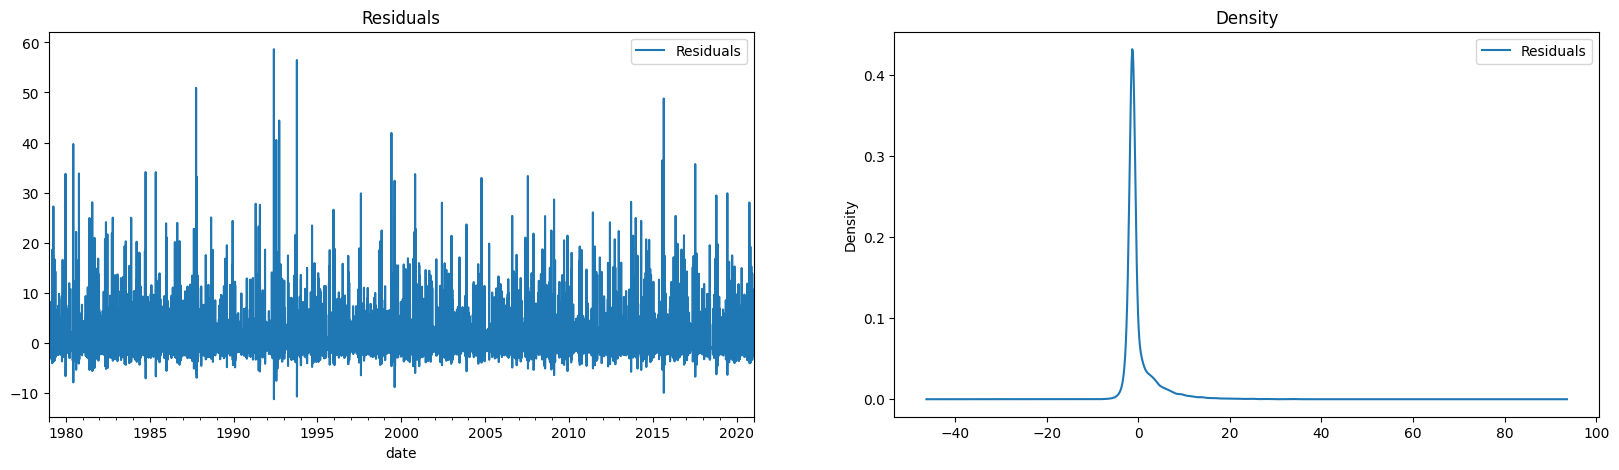

In [127]:


# Residui
residuals = pd.DataFrame(results.resid, columns=["Residuals"])

# Grafico residui
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind="kde", title="Density", ax=ax[1])

plt.show()


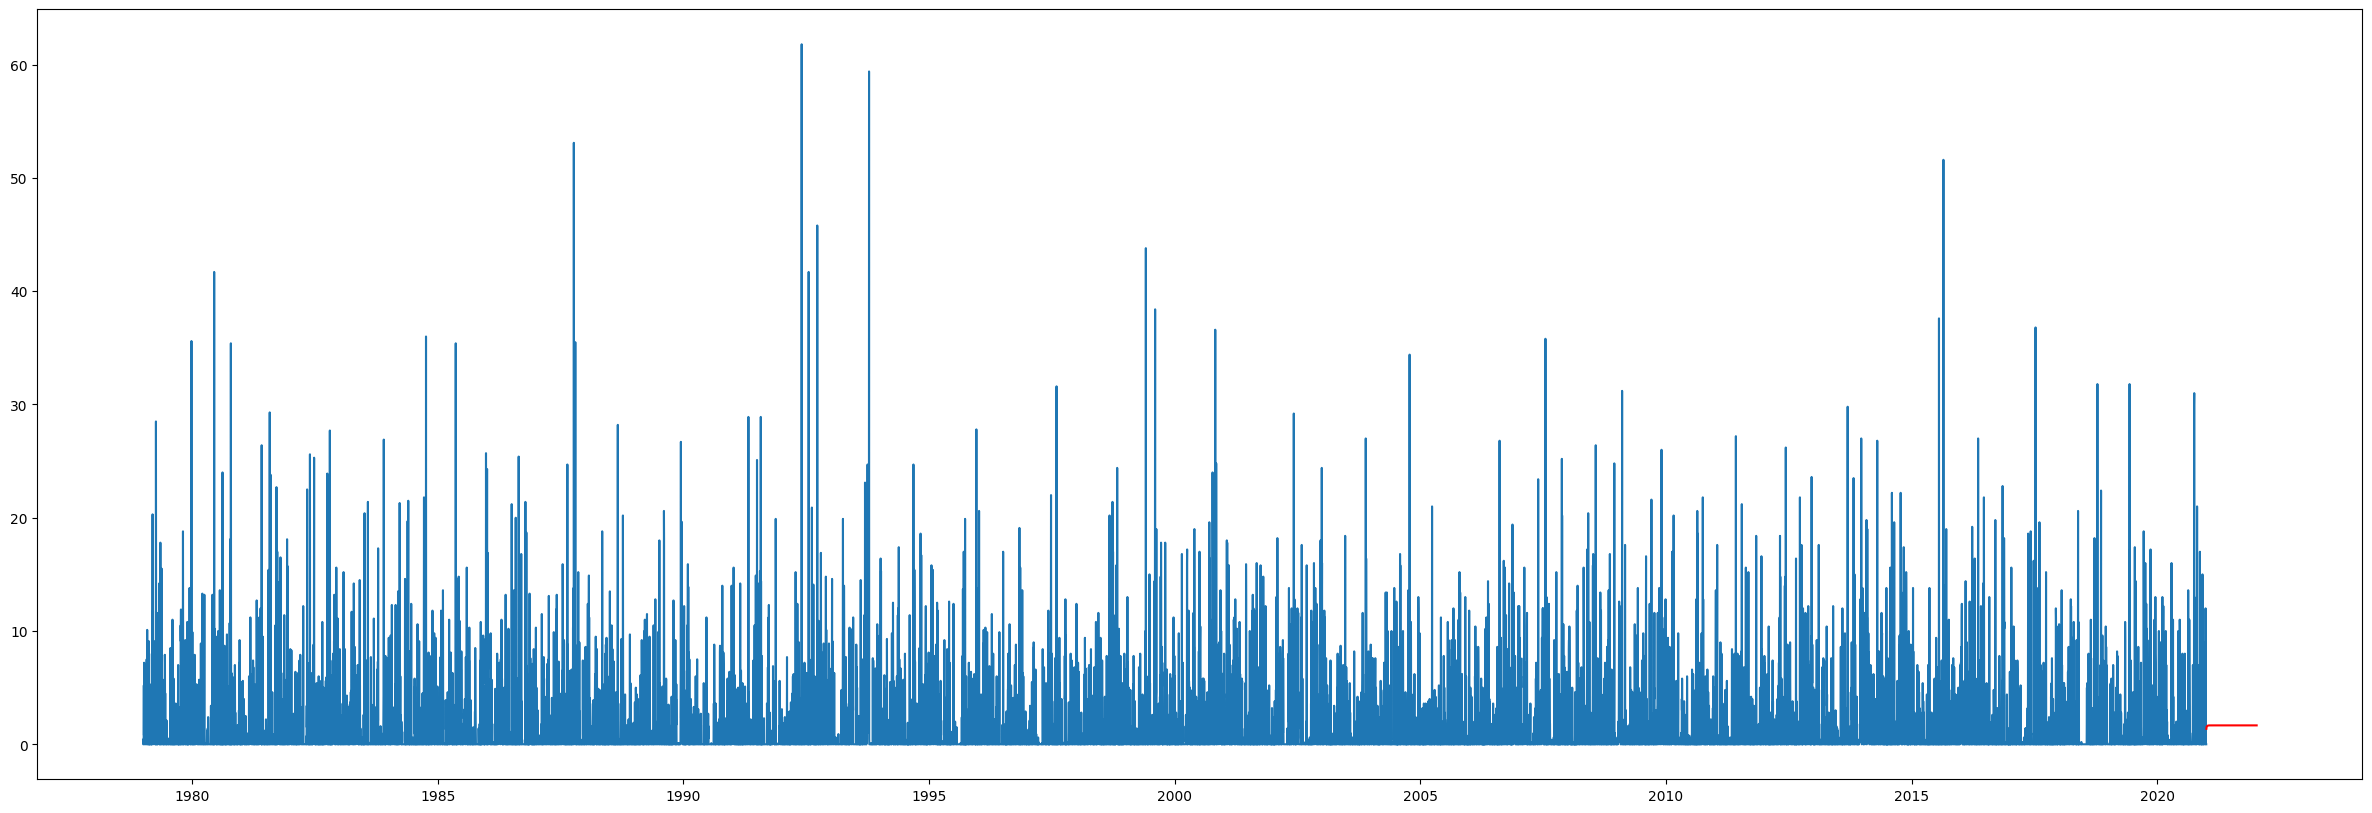

In [128]:
plt.figure(figsize = (30,10), dpi = 100)
num_points = len(data['precipitation'])
x_LO = results.predict(start = (num_points), end = (num_points + 374), dynamic=False)

plt.plot(data['precipitation'][:num_points])
plt.plot(x_LO, color='r')

In [129]:
train_part = int(num_points * 0.85)
test_part = num_points - train_part

train = data['precipitation'][:train_part]
test = data['precipitation'][train_part:]

# Construct the model
new_model = ARIMA(train, order=(1, 0, 1))
# Estimate the parameters
new_results = new_model.fit()

print(new_results.summary()) 

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precipitation   No. Observations:                13039
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -35411.537
Date:                Mon, 03 Mar 2025   AIC                          70831.073
Time:                        21:36:34   BIC                          70860.976
Sample:                    01-01-1979   HQIC                         70841.063
                         - 09-12-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6659      0.073     22.780      0.000       1.523       1.809
ar.L1          0.6901      0.024     29.244      0.000       0.644       0.736
ma.L1         -0.5463      0.026    -21.180      0.0

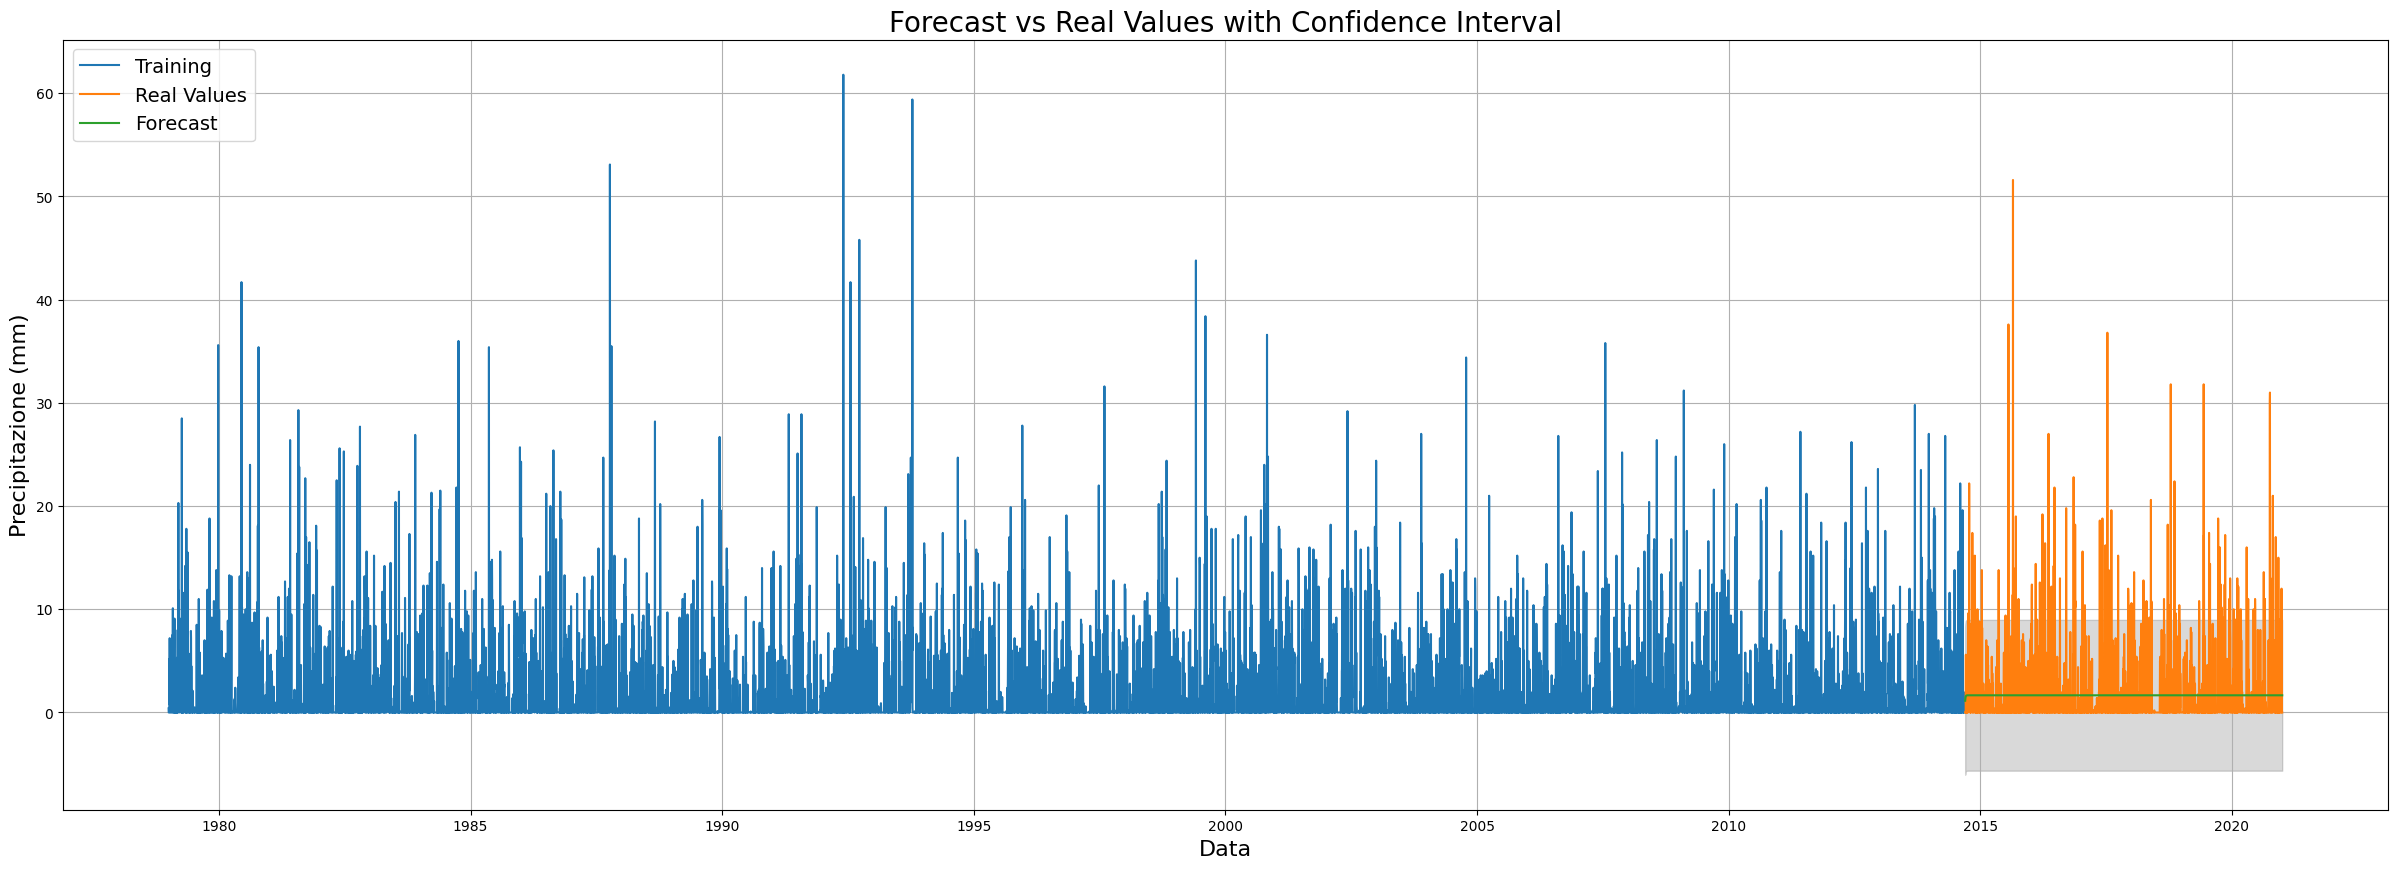

In [130]:
# Previsione sui dati di test con intervallo di confidenza
forecast_results = new_results.get_forecast(steps=len(test))  # Aggiusta il numero di step per il test
conf_int = forecast_results.conf_int(alpha=0.05)

# Estrai i limiti inferiore e superiore
lower_series = conf_int.iloc[:, 0]  # Limite inferiore
upper_series = conf_int.iloc[:, 1]  # Limite superiore

# Estrai le previsioni reali (i valori da mostrare nel grafico)
fc = forecast_results.predicted_mean  # Le previsioni

# Creazione del grafico con intervallo di confidenza
plt.figure(figsize=(30, 10), dpi=100)
plt.plot(train, label="Training")  # Dati di addestramento
plt.plot(test, label="Real Values")  # Dati reali
plt.plot(fc, label="Forecast")  # Previsioni
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)  # Intervallo di confidenza
plt.title("Forecast vs Real Values with Confidence Interval", fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Precipitazione (mm)', fontsize=16)
plt.grid(True)
plt.show()


In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcola gli errori
errors = test - fc  # Gli errori tra valori reali e previsione
abs_errors = np.abs(errors)
percent_errors = np.abs(errors / test) * 100  # Errore percentuale

# Calcolare le metriche
rmse = np.sqrt(mean_squared_error(test, fc))  # Root Mean Squared Error
mae = mean_absolute_error(test, fc)  # Mean Absolute Error
mape = np.mean(percent_errors) if not np.any(test == 0) else float('inf')  # Mean Absolute Percentage Error
me = np.mean(errors)  # Mean Error
mpe = np.mean(percent_errors) if not np.any(test == 0) else float('-inf')  # Mean Percentage Error
correlation = np.corrcoef(test, fc)[0, 1]  # Correlazione tra reale e previsto
minmax = (np.max(test) - np.min(test)) / (np.max(fc) - np.min(fc))  # Min-Max Normalized Error

# Stampa i risultati
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"ME: {me}")
print(f"MPE: {mpe}")
print(f"Correlation: {correlation}")
print(f"MinMax: {minmax}")


RMSE: 3.7842733297536753
MAE: 2.2372371719920747
MAPE: inf
ME: 0.01703354116300351
MPE: -inf
Correlation: 0.017873894180250975
MinMax: 97.813558763282


SARIMAX


In [153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Carica i dati
# Assumiamo che i tuoi dati siano in un dataframe pandas con una colonna 'date' e una colonna 'precipitation'.
# 'date' dovrebbe essere un datetime, e 'precipitation' la serie temporale.

# df = pd.read_csv('path_to_your_data.csv')  # Carica il tuo dataframe
# df['date'] = pd.to_datetime(df['date'])  # Assicurati che la colonna 'date' sia in formato datetime
# df.set_index('date', inplace=True)  # Imposta la colonna 'date' come indice

# Modello SARIMAX
# I parametri che hai trovato sono:
# (p,d,q) = (1, 0, 1) (ARIMA part)
# (P,D,Q,s) = (0, 1, 1, 12) (stagionale part)

model = SARIMAX(data['precipitation'], 
                order=(1, 0, 1),      # Parametri ARIMA
                seasonal_order=(0, 1, 1, 12),  # Parametri stagionali
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fitting del modello
sarimax_result = model.fit(disp=False)

# Visualizza i risultati
print(sarimax_result.summary())

# Puoi anche fare previsioni (forecasting) con il modello adattato
forecast_steps = 12  # Numero di passi da prevedere
forecast = sarimax_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Mostra i risultati delle previsioni
print(forecast_mean)
print(forecast_ci)


C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                      precipitation   No. Observations:                15341
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood              -41681.695
Date:                            Mon, 03 Mar 2025   AIC                          83371.390
Time:                                    23:09:26   BIC                          83401.937
Sample:                                01-01-1979   HQIC                         83381.515
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6819      0.023     29.889      0.000       0.637       0.727
ma.L1         -0.5398      0.025   

C:\Users\MrWhi\AppData\Local\Temp\ipykernel_2940\1868367668.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_mean.index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]


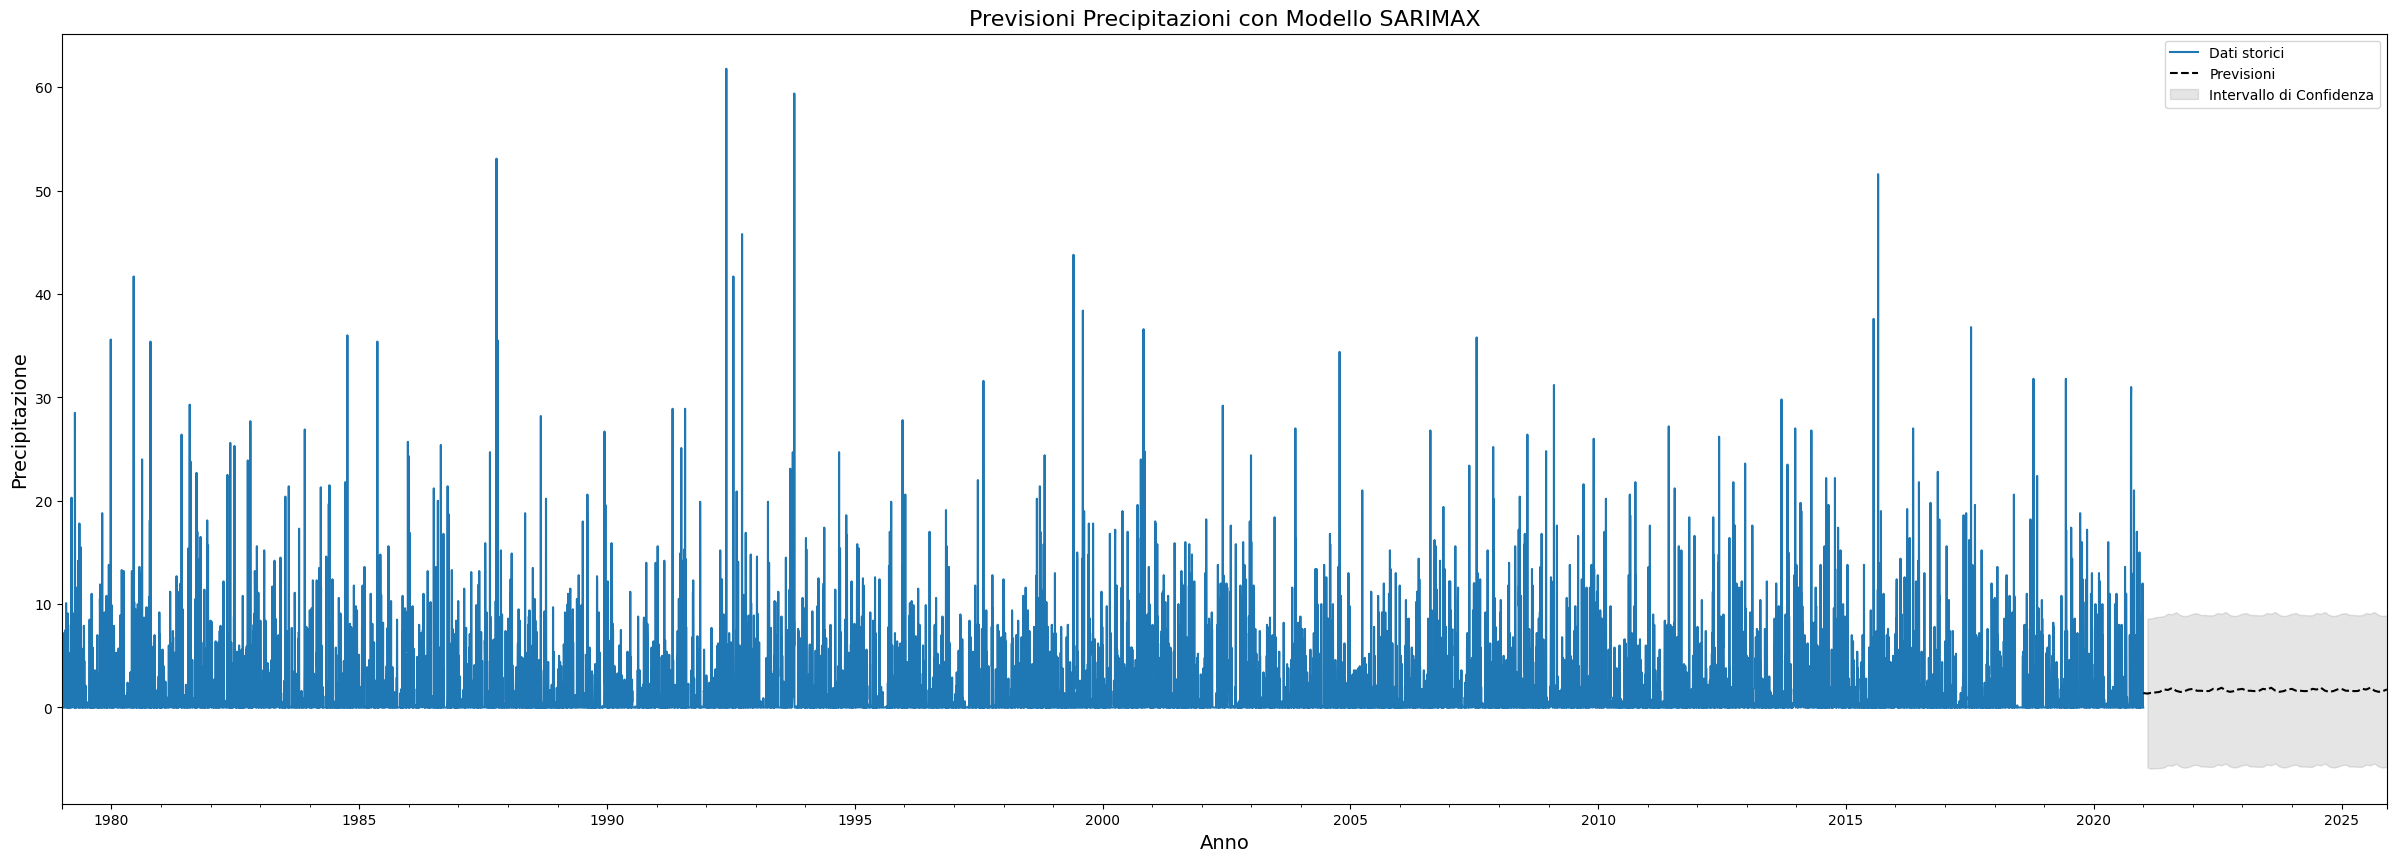

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Crea la figura e l'asse
fig, ax = plt.subplots(figsize=(30, 10), dpi=100)

# Plot dei dati storici
data['precipitation'].plot(ax=ax, label='Dati storici')

# Definisci il numero di passi per la previsione (es. 12 mesi)
forecast_steps = 60

# Ottieni le previsioni future
forecast = sarimax_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Aggiungi le date per le previsioni
forecast_mean.index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Aggiungi la previsione al grafico (linea tratteggiata)
forecast_mean.plot(ax=ax, style='k--', label='Previsioni')

# Aggiungi l'intervallo di confidenza
ax.fill_between(forecast_mean.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1, label='Intervallo di Confidenza')

# Etichetta e titolo
ax.set_xlabel('Anno', fontsize=14)
ax.set_ylabel('Precipitazione', fontsize=14)
ax.set_title('Previsioni Precipitazioni con Modello SARIMAX', fontsize=16)

# Mostra la legenda
ax.legend()

# Mostra il grafico
plt.show()


